# Noise Model Diagnostics: Autocorrelation of the Residuals

This example shows how to use the autocorrelation plots of the residuals to check assumptions of the noise model

Three cases are shown. In the first two, optimisation is used to obtain a best-fit parameter vector in a single output problem. In the first case the noise is correctly specified and in the second case the noise is misspecified. The third case demonstrates the same method in a multiple output problem with Bayesian inference.

## Case 1: Correctly specified noise

For the first example, we will use optimisation to obtain the best-fit parameter vector. See [Optimisation First Example](https://github.com/pints-team/pints/blob/master/examples/optimisation-first-example.ipynb) for more details. We begin with a problem in which the noise is correctly specified: both the data generation and the model use independent Gaussian noise.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4175566    0:00.0
1     12     4175566    0:00.0
2     18     4175566    0:00.0
3     24     3926746    0:00.0
20    126    1923922    0:00.0
40    246    225196.6   0:00.0
60    366    205836.8   0:00.1
80    486    205835.6   0:00.1
100   606    205835.6   0:00.1
120   726    205835.6   0:00.1
140   846    205835.6   0:00.1
160   966    205835.6   0:00.1
180   1086   205835.6   0:00.1
200   1206   205835.6   0:00.1
220   1326   205835.6   0:00.1
240   1446   205835.6   0:00.1
260   1566   205835.6   0:00.2
280   1686   205835.6   0:00.2
300   1806   205835.6   0:00.2
320   1926   205835.6   0:00.2
340   2046   205835.6   0:00.2
360   2166   205835.6   0:00.2
380   2286   205835.6   0:00.2
400   2406   205835.6   0:00.2
420   2526   205835.6   0:00.2
426   2556   205835.6   0:00.2
Halting: No significant change for 200 

### Visualisation of the data
After obtaining these parameters, it is useful to visualize the data and the fit.

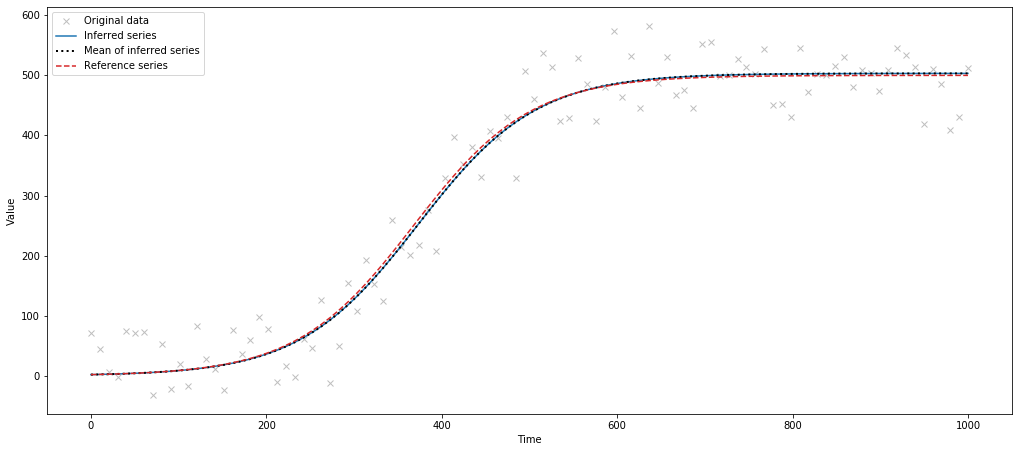

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

### Plotting autocorrelation of the residuals
Next we use the autocorrelation plot of the residuals to evaluate the noise model. This functionality is provided by the `plot_residuals_autocorrelation` method in `pints.residuals_diagnostics`.

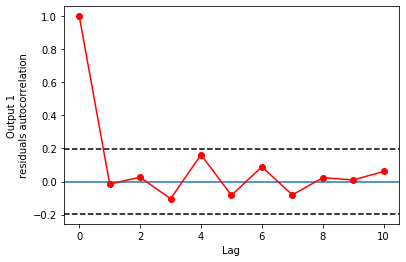

In [3]:
from pints.residuals_diagnostics import plot_residuals_autocorrelation

# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()


The figure shows no significant autocorrelation in the residuals. Therefore, the assumption of independent noise may be valid.

## Case 2: Incorrectly specified noise

For the next case, we generate data with an AR(1) (first order autoregressive) noise model. However, we deliberately misspecify the model and assume independent Gaussian noise (as before) when fitting the parameters.

In [4]:
import pints.noise

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add AR(1) noise
rho = 0.75
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      3962629    0:00.0
1     12     3962629    0:00.0
2     18     3962629    0:00.0
3     24     3955141    0:00.0
20    126    307627.4   0:00.0
40    246    219085     0:00.0
60    366    190041.1   0:00.0
80    486    190038.4   0:00.0
100   606    190038.3   0:00.1
120   726    190038.3   0:00.1
140   846    190038.3   0:00.1
160   966    190038.3   0:00.1
180   1086   190038.3   0:00.1
200   1206   190038.3   0:00.1
220   1326   190038.3   0:00.1
240   1446   190038.3   0:00.1
260   1566   190038.3   0:00.1
280   1686   190038.3   0:00.1
300   1806   190038.3   0:00.2
320   1926   190038.3   0:00.2
340   2046   190038.3   0:00.2
360   2166   190038.3   0:00.2
380   2286   190038.3   0:00.2
400   2406   190038.3   0:00.2
420   2526   190038.3   0:00.2
440   2646   190038.3   0:00.2
460   2766   190038.3   0:00.2
480   28

### Visualisation of the data
As before we plot the data and the inferred trajectory.

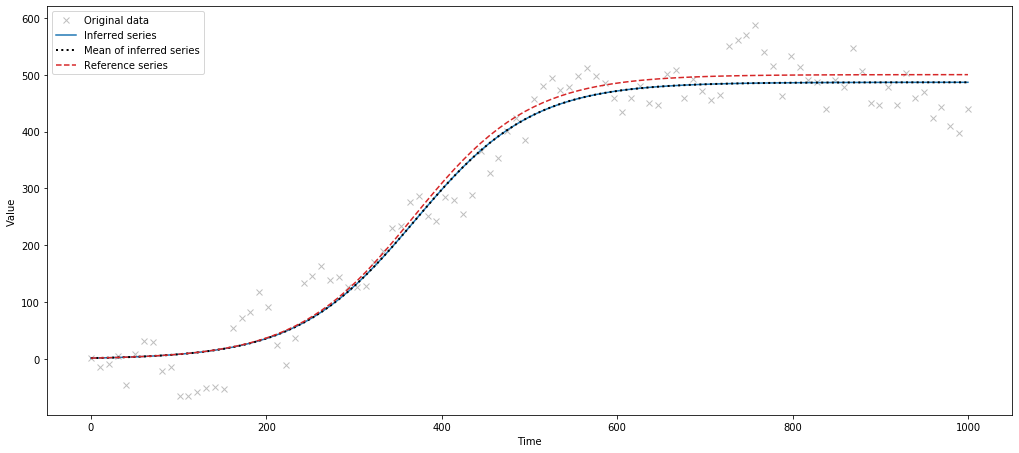

In [5]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

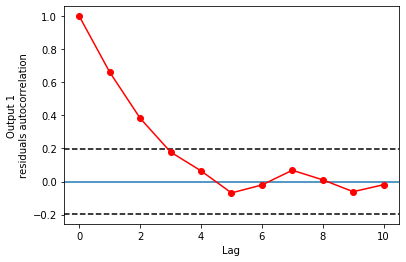

In [6]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()

Now the autocorrelation plot of the residuals shows high autocorrelation at small lags, which is typical of AR(1) noise. Therefore, this visualisation suggests that the assumption of independent Gaussian noise which we made during inference is invalid.

## Case 3: Multiple output Bayesian inference problem 

The `plot_residuals_autocorrelation` function also works with Bayesian inference and multiple output problems. For the final example, we demonstrate the same strategy in this setting.

For this example, the Lotka-Volterra model is used. See the [Lotka-Volterra example](https://github.com/pints-team/pints/blob/master/examples/toy-model-lotka-volterra.ipynb) for more details. As in Case 1, the true data is generated with independent Gaussian noise.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

times = np.linspace(0, 3, 50)
parameters = model.suggested_parameters()
model.set_initial_conditions([2, 2])
org_values = model.simulate(parameters, times)

# Add noise
sigma = 0.1
values = org_values + np.random.normal(0, sigma, org_values.shape)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 1, 1, 0, 0], [6, 6, 6, 6, 1, 1])
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[4, 1, 2, 3, .1, .1]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(4000)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0          0:00.0
2     9      0         0         0          0:00.0
3     12     0         0.25      0          0:00.0
20    63     0.333     0.381     0.381      0:00.1
40    123    0.39      0.439     0.366      0:00.1
60    183    0.377     0.426     0.311      0:00.2
80    243    0.382716  0.382716  0.259      0:00.3
100   303    0.337     0.337     0.208      0:00.3
120   363    0.314     0.314     0.198      0:00.4
140   423    0.27      0.27      0.17       0:00.4
160   483    0.236     0.242236  0.161      0:00.5
180   543    0.215     0.221     0.155      0:00.5
Initial phase completed.
200   603    0.194     0.214     0.144      0:00.6
220   663    0.199095  0.213     0.158371   0:00.6
240   723    0.228     0.232     0.178      0:00.7
260 

3100  9303   0.219     0.22      0.217      0:08.4
3120  9363   0.219     0.22      0.217      0:08.5
3140  9423   0.22      0.220312  0.216      0:08.5
3160  9483   0.22      0.22      0.216      0:08.6
3180  9543   0.219     0.221     0.215      0:08.6
3200  9603   0.219     0.221     0.215      0:08.7
3220  9663   0.218     0.222     0.215      0:08.7
3240  9723   0.218     0.222     0.215      0:08.8
3260  9783   0.218     0.221     0.214      0:08.9
3280  9843   0.217     0.222     0.214      0:08.9
3300  9903   0.216     0.222     0.215      0:09.0
3320  9963   0.216     0.22162   0.214      0:09.0
3340  10023  0.218     0.221     0.215      0:09.1
3360  10083  0.218     0.221     0.216      0:09.1
3380  10143  0.219     0.222     0.216      0:09.2
3400  10203  0.221     0.223     0.216      0:09.3
3420  10263  0.221     0.222     0.215      0:09.3
3440  10323  0.221     0.222     0.215      0:09.4
3460  10383  0.222     0.221     0.216      0:09.4
3480  10443  0.221     0.221   

### Visualisation of the data
As before we plot the data and the inferred trajectories.

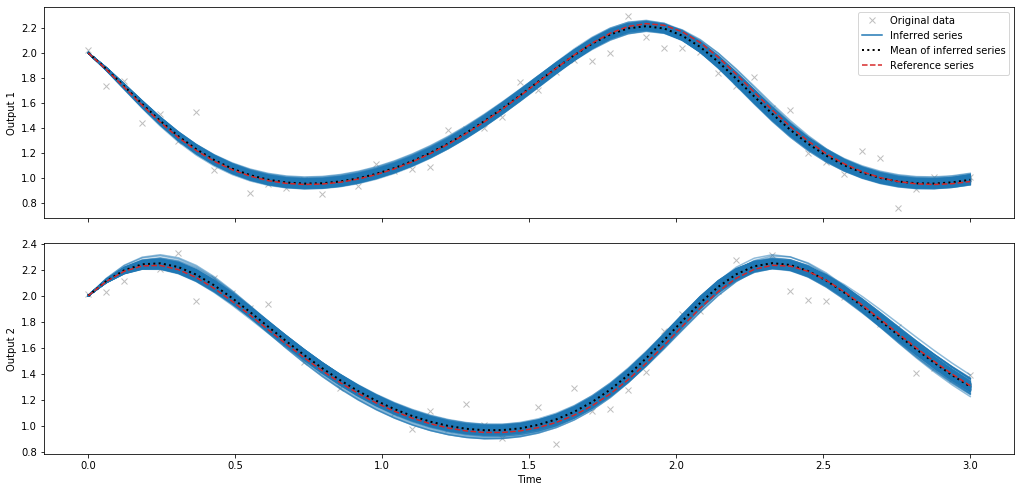

In [8]:
# Get the first MCMC chain
chain1 = chains[0]

# Cut off the burn-in samples
chain1 = chain1[2500:]

fig, ax = pints.plot.series(chain1, problem, ref_parameters=parameters)
fig.set_size_inches(15, 7.5)
plt.show()

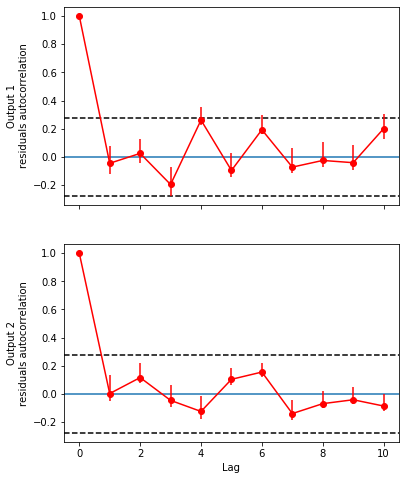

In [9]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(chain1, problem)

plt.show()

The `plot_residuals_autocorrelation` function generates one residuals plot for each output. Additionally, since Bayesian inference was performed and an MCMC chain was provided to the function, it draws a diagram of the distribution of the autocorrelations at each lag over the MCMC samples. Each dot indicates the median autocorrelation, and the bars show the extent of the 95% posterior interval.

In both outputs, no significant autocorrelation in the residuals is seen, as expected since independent Gaussian noise was used to generate the data.